In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import sqlalchemy
import psycopg2
import matplotlib.ticker as mtick
import re

In [2]:
#pd.set_option('display.max_columns', None)

In [22]:
#cars = pd.read_csv("/Users/yunjianh/Desktop/170project/vehicles.csv")
cars = pd.read_csv("/Users/tingjue/Downloads/vehicles.csv")

In [23]:
cars.head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884


# Process Craigslist dataset 

In [13]:
cars = cars.drop(['id'], axis = 1)\
.drop(['image_url'], axis = 1) \
.drop(['size'], axis = 1) \
.drop(['url'], axis = 1) \
.drop(['lat'], axis = 1) \
.drop(['long'], axis = 1) \
.drop(['county'], axis = 1) \
.drop(['region_url'], axis = 1)\
.drop(['type'], axis = 1) 
#.drop(['condition'], axis = 1) \


        #
        # .drop(['vin'], axis = 1) \
        #.drop(['region'], axis = 1) \

cars = cars.applymap(lambda s:s.lower() if type(s) == str else s)
cars = cars.dropna(axis=0, how='any', thresh=None, 
                   subset=['region','price','year','manufacturer','model','cylinders','fuel',
                           'odometer','title_status','vin','paint_color','state','description'], 
                   inplace=False).reset_index(drop=True) 
#'condition','transmission','drive'

cars["condition"].fillna("good", inplace = True)
cars["drive"].fillna("4wd", inplace = True)
cars["transmission"].fillna("automatic", inplace = True)

cars.loc[cars.manufacturer == 'alfa-romeo', 'manufacturer'] = 'alfa_romeo'
cars.loc[cars.manufacturer == 'aston-martin', 'manufacturer'] = 'aston_martin'
cars.loc[cars.manufacturer == 'land rover', 'manufacturer'] = 'land_rover'
cars.loc[cars.manufacturer == 'rover', 'manufacturer'] = 'land_rover'
cars.loc[cars.manufacturer == 'mercedes-benz', 'manufacturer'] = 'mercedes_benz'

cars.drop_duplicates(subset=['price','year','manufacturer','model', 'cylinders','fuel','odometer', 
                             'title_status','transmission','drive','paint_color','state'], keep=False, inplace=True)

cars['id'] = np.arange(cars.shape[0])


cars = cars[(cars.manufacturer != 'datsun') & 
           (cars.manufacturer != 'harley-davidson') &
           (cars.manufacturer != 'hennessey') &
           (cars.manufacturer != 'saturn')] 

cars=cars[(cars.manufacturer != 'morgan')& 
          (cars.manufacturer != 'aston_martin')&
          (cars.manufacturer != 'ferrari') &
          (cars.manufacturer != 'porche')&
          (cars.manufacturer != 'alfa_romeo') &
          (cars.manufacturer != 'tesla')]

cars = cars[(cars.price > 1000) & (cars.price < 120000)] # len(cars[cars.price > 120000]) is 47
cars = cars.reset_index(drop=True)

cars = cars[cars.odometer < 400000]
cars = cars[cars.odometer>100]
# cars[cars.odometer > 400000] is 334
cars = cars.reset_index(drop=True)

cars = cars[cars.year > 1980] # cars[cars.year < 1980] is 948
cars = cars.reset_index(drop=True)

cars = cars[cars['vin'].map(len) ==17]
cars=cars[~cars.vin.str.endswith('x')]

## EDA

In [3]:
brand_freq = cars.groupby(['manufacturer']).manufacturer.agg('count').to_frame('cnt') \
                 .sort_values(by=['cnt'], ascending=False).reset_index()

Text(0.5, 1.0, 'Count of posts of 10 most manufacturers')

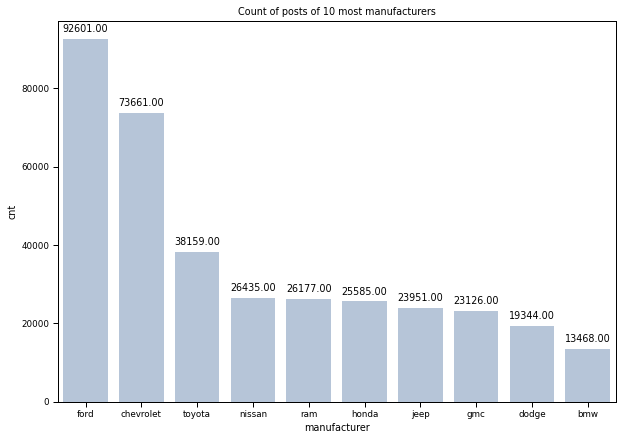

In [10]:
plt.figure(figsize=(10, 7))
splot = sns.barplot(data=brand_freq.head(0), x = 'manufacturer', y = 'cnt', ci = None, color = 'lightsteelblue')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points')
sns.set_context('paper')
splot.set_title('Count of posts of 10 most manufacturers')


In [9]:
print(cars.price.mean())
print(cars.price.median())
print(cars.price.max())
print(cars.price.min())

81992.67598619971
8989.0
3600028900
0


Text(0, 0.5, 'Count')

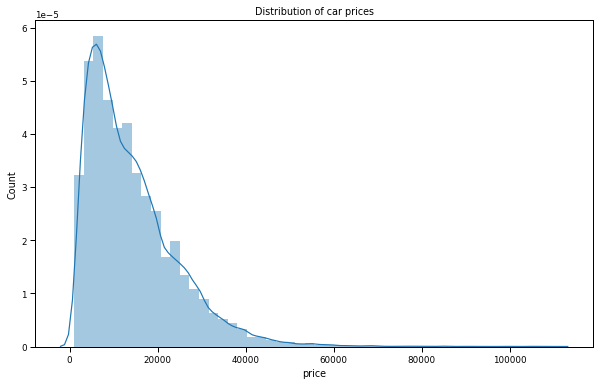

In [20]:
x = cars.price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Distribution of car prices')
sns.set_context('paper')
plt.ylabel("Count")

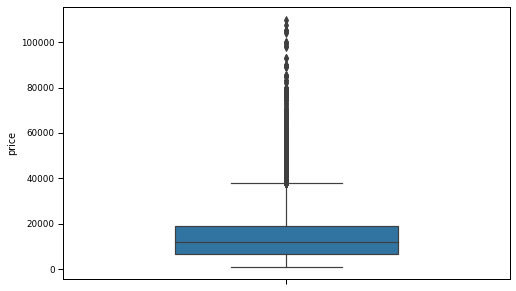

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=cars, width=0.5)
sns.set_context('paper')

In [8]:
print(cars.odometer.mean())
print(cars.odometer.max()) 

111454.79239416614
10000000.0


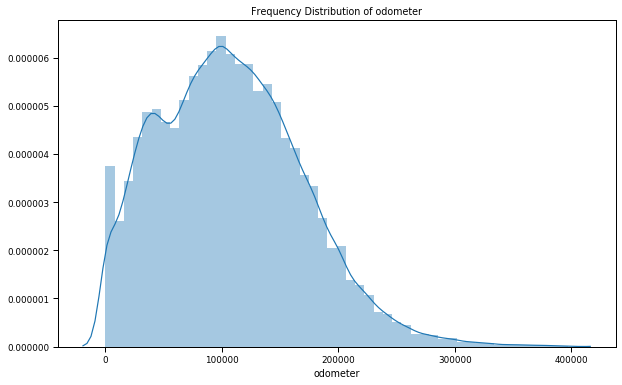

In [15]:
x = cars.odometer
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution of odometer')
sns.set_context('paper')

In [16]:
print(cars.year.mean())
print(cars.year.min()) 

2009.2893144023274
1917.0


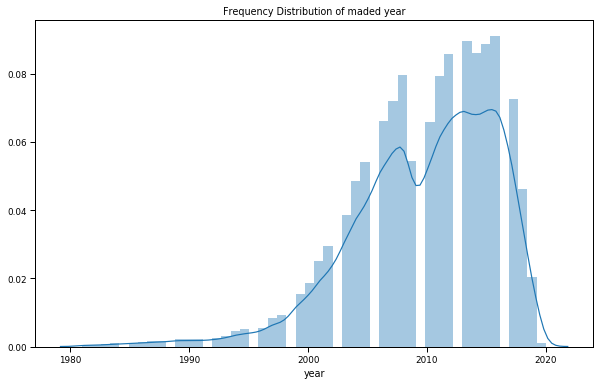

In [18]:
x = cars.year
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution of maded year')
sns.set_context('paper')

In [12]:
set(cars['manufacturer'])

{'acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'fiat',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land_rover',
 'lexus',
 'lincoln',
 'mazda',
 'mercedes_benz',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'pontiac',
 'ram',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

In [ ]:
# 32 manufactueres

In [69]:
cars.to_csv('cars_revised.csv')

## Process edmunds data

#yunjian 
acura         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Acura.csv",'r'), encoding='utf-8', engine='python')
#alfa_romeo    = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/AlfaRomeo.csv",'r'), encoding='utf-8', engine='python')
#aston_martin  = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/AstonMartin.csv",'r'), encoding='utf-8', engine='python')
audi          = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Audi.csv",'r'), encoding='utf-8', engine='python')
bmw           = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/BMW.csv",'r'), encoding='utf-8', engine='python')
buick         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Buick.csv",'r'), encoding='utf-8', engine='python')
cadillac      = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Cadillac.csv",'r'), encoding='utf-8', engine='python')
chevrolet     = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Chevrolet.csv",'r'), encoding='utf-8', engine='python')
chrysler      = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Chrysler.csv",'r'), encoding='utf-8', engine='python')
dodge         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Dodge.csv",'r'), encoding='utf-8', engine='python')
ferrari       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/ferrari.csv",'r'), encoding='utf-8', engine='python')
fiat          = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/fiat.csv",'r'), encoding='utf-8', engine='python')
ford          = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/ford.csv",'r'), encoding='utf-8', engine='python')
gmc           = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/GMC.csv",'r'), encoding='utf-8', engine='python')
honda         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Honda.csv",'r'), encoding='utf-8', engine='python')
hyundai       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/hyundai.csv",'r'), encoding='utf-8', engine='python')
infiniti      = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/infiniti.csv",'r'), encoding='utf-8', engine='python')
jaguar        = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/jaguar.csv",'r'), encoding='utf-8', engine='python')
jeep          = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/jeep.csv",'r'), encoding='utf-8', engine='python')
kia           = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/kia.csv",'r'), encoding='utf-8', engine='python')
land_rover    = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/land-rover.csv",'r'), encoding='utf-8', engine='python')
lexus         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/lexus.csv",'r'), encoding='utf-8', engine='python')
lincoln       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/lincoln.csv",'r'), encoding='utf-8', engine='python')
mazda         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/mazda.csv",'r'), encoding='utf-8', engine='python')
mercedes_benz = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/mercedes-benz.csv",'r'), encoding='utf-8', engine='python')
mercury       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/mercury.csv",'r'), encoding='utf-8', engine='python')
mini          = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/mini.csv",'r'), encoding='utf-8', engine='python')
mitsubishi    = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/mitsubishi.csv",'r'), encoding='utf-8', engine='python')
nissan        = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/nissan.csv",'r'), encoding='utf-8', engine='python')
pontiac       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/pontiac.csv",'r'), encoding='utf-8', engine='python')
#porsche       = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/porsche.csv",'r'), encoding='utf-8', engine='python')
ram           = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/ram.csv",'r'), encoding='utf-8', engine='python')
subaru        = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/subaru.csv",'r'), encoding='utf-8', engine='python')
#tesla         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/tesla.csv",'r'), encoding='utf-8', engine='python')
toyota        = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Toyota.csv",'r'), encoding='utf-8', engine='python')
volkswagen    = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/Volkswagen.csv",'r'), encoding='utf-8', engine='python')
volvo         = pd.read_csv(open("/Users/yunjianh/Desktop/edmunds/volvo.csv",'r'), encoding='utf-8', engine='python')

In [3]:
#tingjue 
acura         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Acura.csv",'r'), encoding='utf-8', engine='python')
audi          = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Audi.csv",'r'), encoding='utf-8', engine='python')
bmw           = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/BMW.csv",'r'), encoding='utf-8', engine='python')
buick         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Buick.csv",'r'), encoding='utf-8', engine='python')
cadillac      = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Cadillac.csv",'r'), encoding='utf-8', engine='python')
chevrolet     = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Chevrolet.csv",'r'), encoding='utf-8', engine='python')
chrysler      = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Chrysler.csv",'r'), encoding='utf-8', engine='python')
dodge         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Dodge.csv",'r'), encoding='utf-8', engine='python')
fiat          = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/fiat.csv",'r'), encoding='utf-8', engine='python')
ford          = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/ford.csv",'r'), encoding='utf-8', engine='python')
gmc           = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/GMC.csv",'r'), encoding='utf-8', engine='python')
honda         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Honda.csv",'r'), encoding='utf-8', engine='python')
hyundai       = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/hyundai.csv",'r'), encoding='utf-8', engine='python')
infiniti      = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/infiniti.csv",'r'), encoding='utf-8', engine='python')
jaguar        = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/jaguar.csv",'r'), encoding='utf-8', engine='python')
jeep          = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/jeep.csv",'r'), encoding='utf-8', engine='python')
kia           = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/kia.csv",'r'), encoding='utf-8', engine='python')
land_rover    = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/land-rover.csv",'r'), encoding='utf-8', engine='python')
lexus         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/lexus.csv",'r'), encoding='utf-8', engine='python')
lincoln       = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/lincoln.csv",'r'), encoding='utf-8', engine='python')
mazda         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/mazda.csv",'r'), encoding='utf-8', engine='python')
mercedes_benz = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/mercedes-benz.csv",'r'), encoding='utf-8', engine='python')
mercury       = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/mercury.csv",'r'), encoding='utf-8', engine='python')
mini          = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/mini.csv",'r'), encoding='utf-8', engine='python')
mitsubishi    = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/mitsubishi.csv",'r'), encoding='utf-8', engine='python')
nissan        = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/nissan.csv",'r'), encoding='utf-8', engine='python')
pontiac       = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/pontiac.csv",'r'), encoding='utf-8', engine='python')
ram           = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/ram.csv",'r'), encoding='utf-8', engine='python')
subaru        = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/subaru.csv",'r'), encoding='utf-8', engine='python')
toyota        = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Toyota.csv",'r'), encoding='utf-8', engine='python')
volkswagen    = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/Volkswagen.csv",'r'), encoding='utf-8', engine='python')
volvo         = pd.read_csv(open("/Users/tingjue/Downloads/edmunds/volvo.csv",'r'), encoding='utf-8', engine='python')

In [5]:
edmunds = pd.concat([acura, audi, bmw, buick, cadillac, chevrolet, chrysler, 
                dodge, fiat, ford, gmc, honda, hyundai, infiniti, jaguar, jeep, kia, 
                land_rover, lexus, lincoln, mazda, mercury,mercedes_benz, mini, mitsubishi,nissan, pontiac, 
                     ram, subaru,toyota, volkswagen, volvo], axis=0) 
edmunds = edmunds.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
edmunds = edmunds.applymap(lambda s:s.lower() if type(s) == str else s)
edmunds.drop(edmunds.columns[0], axis=1)


,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 11/10/17 22:53 pm (pst),v mel,2014 acura rlx sedan technology package 4dr se...,good car,this acura rlx has been a great vehicle for ...,4.000
1,on 07/03/17 09:06 am (pdt),rlxer,2014 acura rlx sedan technology package 4dr se...,rlxer,fast lots of room good gas mileage if you kee...,4.000
2,on 01/02/17 17:02 pm (pst),dpaprocki,2014 acura rlx sedan advance package 4dr sedan...,wish i had a better rlx story,"2014 acura rlx, with advanced package, purcha...",1.000
3,on 02/22/16 14:48 pm (pst),ed koval,2014 acura rlx sedan 4dr sedan (3.5l 6cyl 6a),almost perfect,"there is a lot to like about this car, and fr...",4.000
4,on 11/02/15 18:50 pm (pst),ss,2014 acura rlx sedan navigation 4dr sedan (3.5...,"overall, great car but it does have some problems","i'm very happy with the performance, handling...",3.000
...,...,...,...,...,...,...
6127,on 05/02/09 20:12 pm (pdt),new c30 owner,2009 volvo c30 hatchback t5 r-design 2dr hatch...,love this car!,"not the fastest thing out there, but no slouc...",4.750
6128,on 02/10/09 12:03 pm (pst),formertruckowner,2009 volvo c30 hatchback t5 r-design 2dr hatch...,this is what i was looking for,"i've only had this car a few weeks, but was l...",4.750
6129,on 01/14/09 04:53 am (pst),wm,2009 volvo c30 hatchback t5 r-design 2dr hatch...,fun car,caveat this review with the fact i've only ow...,4.875
6130,on 01/02/09 20:20 pm (pst),marq,2009 volvo c30 hatchback t5 r-design 2dr hatch...,my first volvo,"i now have 860 miles on my new c30, and i am ...",4.000


In [11]:
edmunds['year'] = edmunds.Vehicle_Title.str.split(' ').str[0]

edmunds['manufacturer'] = edmunds.Vehicle_Title.str.lower().str.split(' ').str[1]
#edmunds.loc[edmunds.manufacturer == 'alfa', 'manufacturer'] = 'alfa_romeo'
#edmunds.loc[edmunds.manufacturer == 'aston', 'manufacturer'] = 'aston_martin'
edmunds.loc[edmunds.manufacturer == 'land', 'manufacturer'] = 'land_rover'
edmunds.loc[edmunds.manufacturer == 'mercedes', 'manufacturer'] = 'mercedes_benz'

#extract model
edmunds['model'] = edmunds.Vehicle_Title.str.lower()
edmunds['model'] = edmunds.model.str.extract('^(.*?)(convertible|coupe|hatchback|minivan|offroad|pickup|sedan|suv|truck|van|wagon|bus)')
edmunds['model'] = edmunds.model.str.split(' ').str[2:]
edmunds['model'] = np.where(#(edmunds['manufacturer'] == 'alfa_romeo') |
                            #(edmunds['manufacturer'] == 'aston_martin') |
                            (edmunds['manufacturer'] == 'land_rover') |
                            (edmunds['manufacturer'] == 'mercedes_benz'), 
                            edmunds['model'].str[1:], edmunds['model'])

edmunds = edmunds.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) \
                 .sort_values(by = ['manufacturer','year']).reset_index(drop=True)

lst = []
for i in edmunds['model']:
    lst.append(i)

lst2 = []
for i in range(len(lst)):
    if len(lst[i]) == 1:
        lst2.append(lst[i][0])
    elif len(lst[i]) > 1:
        if (len(lst[i][0])==1) | (lst[i][1] in ['hybrid', 'marquis']): # we could add more into this list
            lst2.append(lst[i][0] + ' ' + lst[i][1])
        else:
            lst2.append(lst[i][0])
    else:
        lst2.append('')
        
df = pd.DataFrame({'model':lst2})
        
edmunds = pd.concat([edmunds.year, edmunds.manufacturer, df.model, edmunds.Rating], axis=1)
indexs = edmunds[(edmunds['model'] == '') | (edmunds['year'] == '') | (edmunds['manufacturer'] == '')].index
edmunds.drop(indexs, inplace=True)
edmunds = edmunds.reset_index(drop=True)
edmunds

,year,manufacturer,model,Rating
0,1997,acura,tl,4.125
1,1997,acura,tl,5.000
2,1997,acura,tl,4.000
3,1997,acura,tl,4.875
4,1997,acura,tl,4.750
...,...,...,...,...
190787,2019,volvo,xc40,5.000
190788,2019,volvo,xc40,5.000
190789,2019,volvo,xc40,2.000
190790,2019,volvo,xc40,5.000


In [31]:
edmunds.groupby(['year','manufacturer', 'model']).describe()

Rating                                      \
                               count      mean       std    min      25%   
year manufacturer model                                                    
1997 acura        cl            58.0  4.607759  0.595786  2.500  4.53125   
                  integra       40.0  4.671875  0.392934  2.875  4.50000   
                  nsx            5.0  4.875000  0.153093  4.625  4.87500   
                  rl            30.0  4.583333  0.638504  2.750  4.53125   
                  slx            1.0  3.375000       NaN  3.375  3.37500   
...                              ...       ...       ...    ...      ...   
2018 volvo        xc60          28.0  4.285714  1.150109  1.000  4.00000   
                  xc60 hybrid    3.0  5.000000  0.000000  5.000  5.00000   
                  xc90          25.0  3.760000  1.479865  1.000  2.00000   
                  xc90 hybrid    7.0  3.428571  1.272418  2.000  2.50000   
2019 volvo        xc40           5.0  4.400000  1.341641  2.000  5.00000   

                                                    
                                 50%    75%    max  
year manufacturer model                             
1997 acura        cl           4.875  5.000  5.000  
                  integra      4.750  5.000  5.000  
                  nsx          4.875  5.000  5.000  
                  rl           4.750  5.000  5.000  
                  slx          3.375  3.375  3.375  
...                              ...    ...    ...  
2018 volvo        xc60         5.000  5.000  5.000  
                  xc60 hybrid  5.000  5.000  5.000  
                  xc90         5.000  5.000  5.000  
                  xc90 hybrid  3.000  4.500  5.000  
2019 volvo        xc40         5.000  5.000  5.000  

[4646 rows x 8 columns]

In [12]:
rating = edmunds.groupby(['year', 'manufacturer', 'model']) \
                .agg({'Rating':'mean'}) \
                .rename(columns={'Rating':'avg_rating'}) \
                .sort_values(by = ['manufacturer', 'model', 'year']) \
                .reset_index()

cnt = edmunds.groupby(['year', 'manufacturer', 'model']) \
                .agg({'Rating':'count'}) \
                .rename(columns={'Rating':'count'}) \
                .sort_values(by = ['manufacturer', 'model', 'year']) \
                .reset_index()

edmunds = pd.merge(rating, cnt)  #avg_rating is based on year, manufacturer and model of a car
edmunds['id'] = np.arange(edmunds.shape[0])
edmunds['year']=edmunds['year'].astype(int)
edmunds

,year,manufacturer,model,avg_rating,count,id
0,1997,acura,cl,4.607759,58,0
1,1998,acura,cl,4.678977,44,1
2,1999,acura,cl,4.666667,54,2
3,2001,acura,cl,4.573864,110,3
4,2002,acura,cl,4.442857,35,4
...,...,...,...,...,...,...
4641,2017,volvo,xc90,3.551724,29,4641
4642,2018,volvo,xc90,3.760000,25,4642
4643,2016,volvo,xc90 hybrid,3.142857,14,4643
4644,2017,volvo,xc90 hybrid,4.200000,10,4644
